In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv(r"/Users/ewoyi/Projects/Python Projects/QVI_purchase_behaviour.csv")

df2 = pd.read_csv(r"/Users/ewoyi/Projects/Python Projects/QVI_transaction_data.csv")

In [4]:
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
# Checking for missing values in df1
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

LYLTY_CARD_NBR - 0.0%
LIFESTAGE - 0.0%
PREMIUM_CUSTOMER - 0.0%


In [7]:
# Checking the data type
df1.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [8]:
# Looking out for outliers
df1.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [9]:
# Checking for missing values in df2
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

DATE - 0.0%
STORE_NBR - 0.0%
LYLTY_CARD_NBR - 0.0%
TXN_ID - 0.0%
PROD_NBR - 0.0%
PROD_NAME - 0.0%
PROD_QTY - 0.0%
TOT_SALES - 0.0%


In [10]:
df2.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [11]:
# Looking out for outliers
df2.describe()[['PROD_QTY', 'TOT_SALES']]

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [12]:
import plotly.express as px

<Axes: >

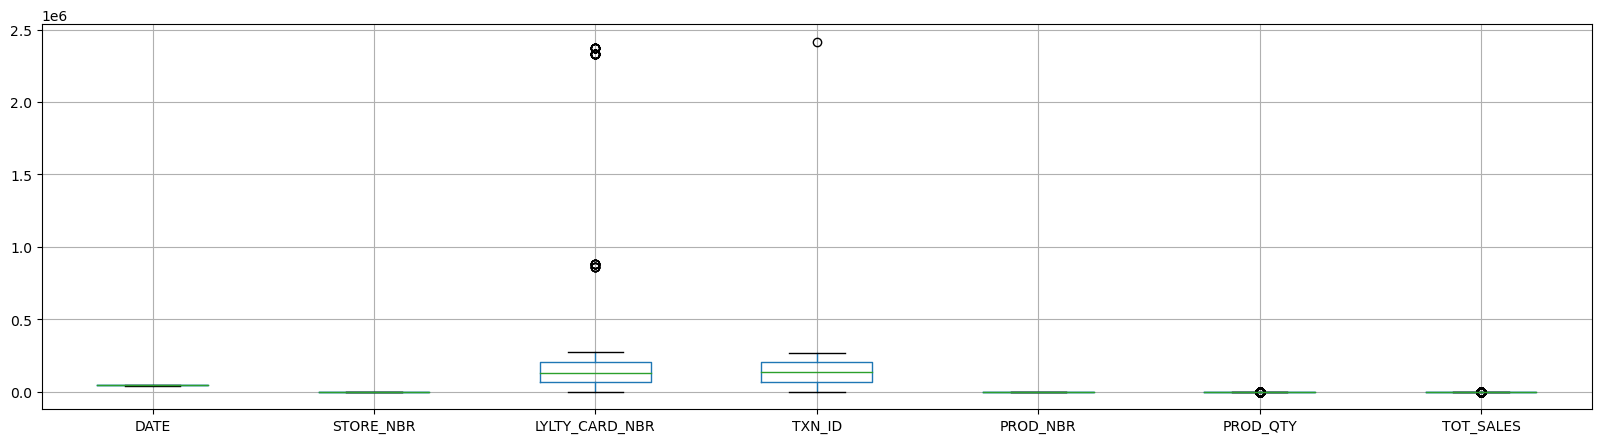

In [43]:
df2.boxplot(figsize=(20,5))

In [13]:
df2['pack_size'] = df2['PROD_NAME'].str.extract('(\d+)')

In [14]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


In [15]:
df2.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
pack_size          object
dtype: object

In [16]:
# filtering out for chips in product name
df3 = df2[df2['PROD_NAME'].str.contains("Chip")]

In [17]:
df3.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [18]:
# Merging files together
df4 = pd.merge(df1,df3, on='LYLTY_CARD_NBR', how='right')

In [19]:
df4.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
3,4149,MIDAGE SINGLES/COUPLES,Budget,43601,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
4,5026,MIDAGE SINGLES/COUPLES,Budget,43332,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [20]:
# Checking for missing values in merged data
for col in df4.columns:
    tag_missing = np.mean(df4[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

LYLTY_CARD_NBR - 0.0%
LIFESTAGE - 0.0%
PREMIUM_CUSTOMER - 0.0%
DATE - 0.0%
STORE_NBR - 0.0%
TXN_ID - 0.0%
PROD_NBR - 0.0%
PROD_NAME - 0.0%
PROD_QTY - 0.0%
TOT_SALES - 0.0%
pack_size - 0.0%


In [21]:
# Table summary
df4.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
count,7.457000e+04,74570,74570,74570.000000,74570.000000,74570.000000,74570.000000,74570,74570.000000,74570.000000,74570
unique,NaN,7,3,NaN,NaN,NaN,NaN,33,NaN,NaN,8
top,NaN,OLDER SINGLES/COUPLES,Mainstream,NaN,NaN,NaN,NaN,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,NaN,NaN,175
freq,NaN,15304,28539,NaN,NaN,NaN,NaN,3269,NaN,NaN,29215
mean,1.359095e+05,NaN,NaN,43464.015529,135.457651,135533.580448,50.651039,NaN,1.904264,6.860511,NaN
std,8.025342e+04,NaN,NaN,105.501970,76.753058,77960.794363,32.792579,NaN,0.343675,2.256661,NaN
min,1.000000e+03,NaN,NaN,43282.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.900000,NaN
25%,7.013000e+04,NaN,NaN,43373.000000,70.000000,68237.250000,27.000000,NaN,2.000000,5.800000,NaN
50%,1.311975e+05,NaN,NaN,43463.000000,131.000000,135503.500000,42.000000,NaN,2.000000,6.600000,NaN
75%,2.032402e+05,NaN,NaN,43555.000000,203.000000,203284.250000,78.000000,NaN,2.000000,7.800000,NaN


In [22]:
df5 = df4.dropna()
df5.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
3,4149,MIDAGE SINGLES/COUPLES,Budget,43601,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
4,5026,MIDAGE SINGLES/COUPLES,Budget,43332,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [23]:
# Changing the date format to a proper date
from datetime import datetime, timedelta

In [24]:
df5['DATE'] = df5['DATE'].apply(lambda x: datetime(1899, 12, 30) + timedelta(days=int(x)))


In [25]:
df5.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
3,4149,MIDAGE SINGLES/COUPLES,Budget,2019-05-16,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
4,5026,MIDAGE SINGLES/COUPLES,Budget,2018-08-20,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [26]:
# Importing to excel
df5.to_excel("quantium.xlsx")

# Exploratory Analysis

In [30]:
# Transaction over time
df6 = df5.groupby('DATE')[['TXN_ID']].count().sort_values(by="TXN_ID")
df6

,TXN_ID
DATE,
2018-10-18,163
2019-01-15,165
2018-08-17,166
2018-07-01,167
2019-06-13,168
...,...
2018-12-18,246
2018-12-22,247
2018-12-19,257


<Axes: title={'center': 'Transaction over time'}, xlabel='DATE', ylabel='Total transactions'>

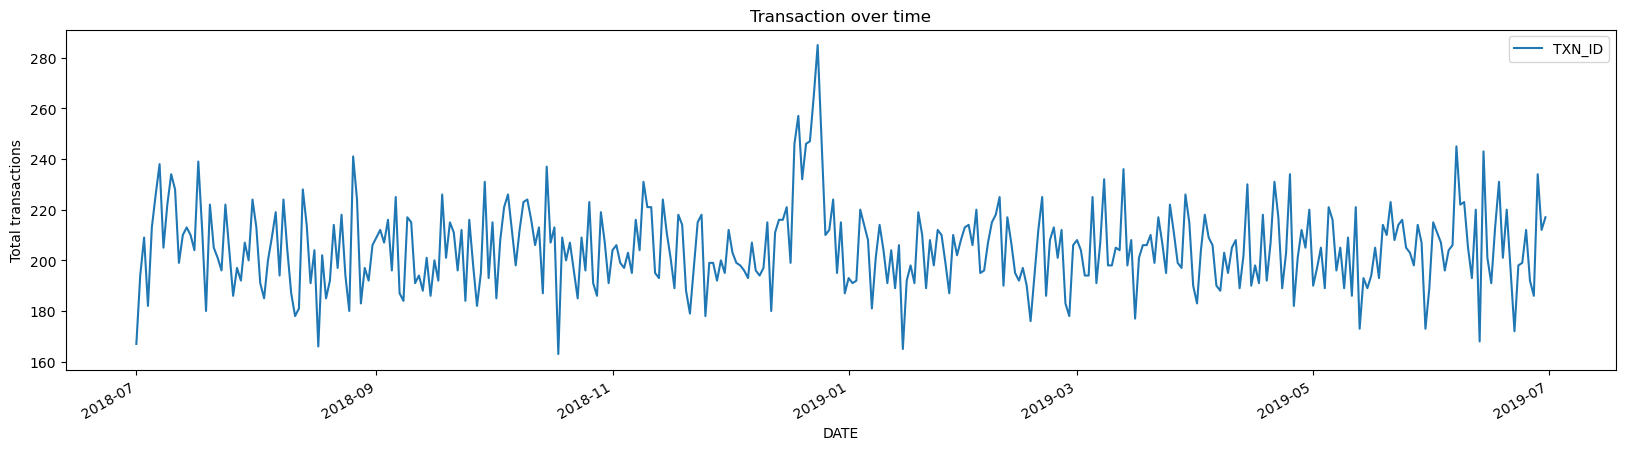

In [32]:
# Visual representation
df6.plot(figsize=(20,5), title='Transaction over time', ylabel='Total transactions')

### The chart shows that the total transactions, picked at december, 2018. subsequently, there was a sharp fall leading to the following year.

In [44]:
# Proportion of customers
df7 = df5.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['PREMIUM_CUSTOMER']].count().unstack().fillna(0)
df7

PREMIUM_CUSTOMER                   
PREMIUM_CUSTOMER                 Budget Mainstream Premium
LIFESTAGE                                                 
MIDAGE SINGLES/COUPLES             1473       3333    2298
NEW FAMILIES                        840        635     449
OLDER FAMILIES                     6539       4112    3131
OLDER SINGLES/COUPLES              5172       5162    4970
RETIREES                           4305       5958    3572
YOUNG FAMILIES                     5406       3696    3318
YOUNG SINGLES/COUPLES              2708       5643    1850

<Axes: title={'center': 'Proportion of customers'}, xlabel='lifestages', ylabel='Total Customers'>

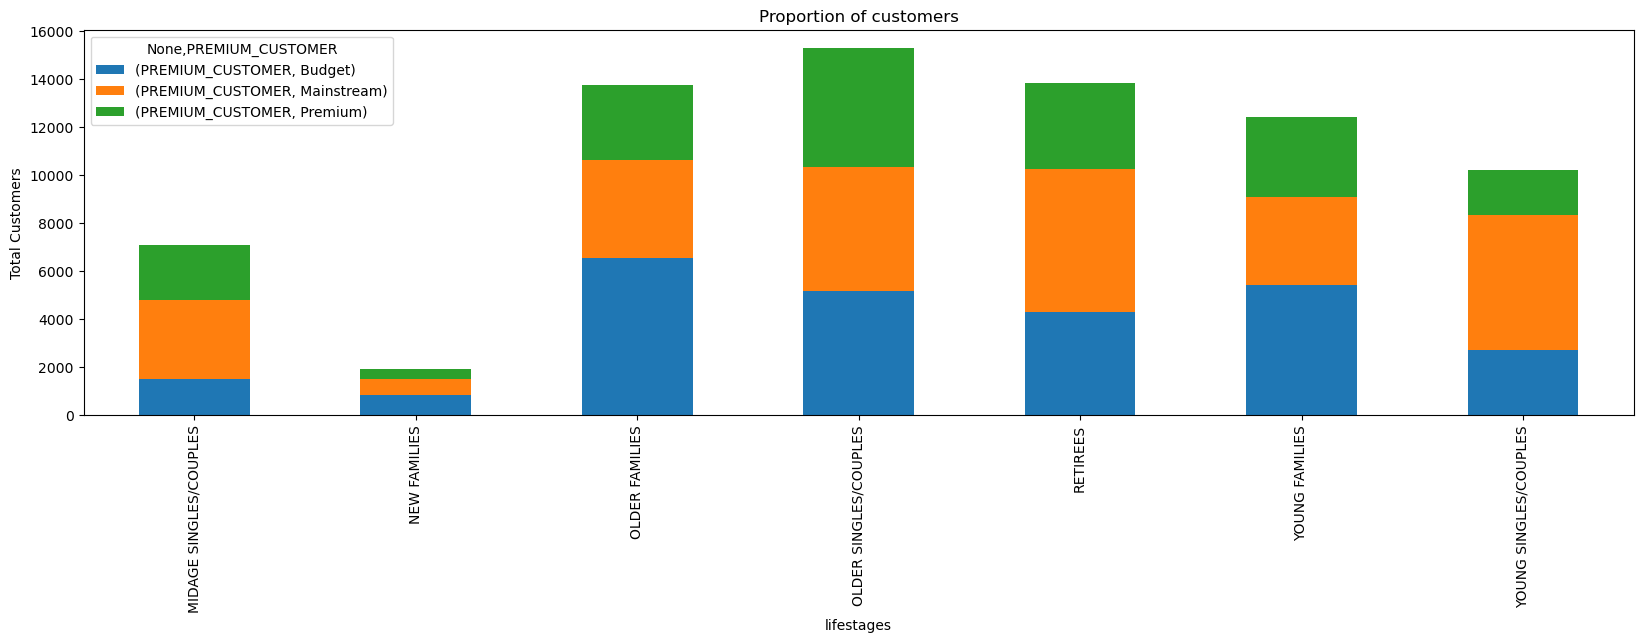

In [45]:
df7.plot(kind='bar', 
         stacked = True, 
         figsize=(20,5), 
         title = "Proportion of customers", 
         ylabel = 'Total Customers',
         xlabel = 'lifestages')


#### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget Older families segment.


In [48]:
# Proportion of Sales
df8 = df5.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().unstack().fillna(0)
df8

TOT_SALES                    
PREMIUM_CUSTOMER          Budget Mainstream  Premium
LIFESTAGE                                           
MIDAGE SINGLES/COUPLES    9838.3    23950.4  15349.4
NEW FAMILIES              5651.4     4307.1   3087.3
OLDER FAMILIES           44859.2    28298.5  21256.1
OLDER SINGLES/COUPLES    35943.0    35443.2  34545.0
RETIREES                 30051.8    40592.1  24804.4
YOUNG FAMILIES           37064.1    25319.5  22781.1
YOUNG SINGLES/COUPLES    16777.1    40069.9  11599.4

<Axes: title={'center': 'Proportion of sales'}, xlabel='lifestages', ylabel='Total sales'>

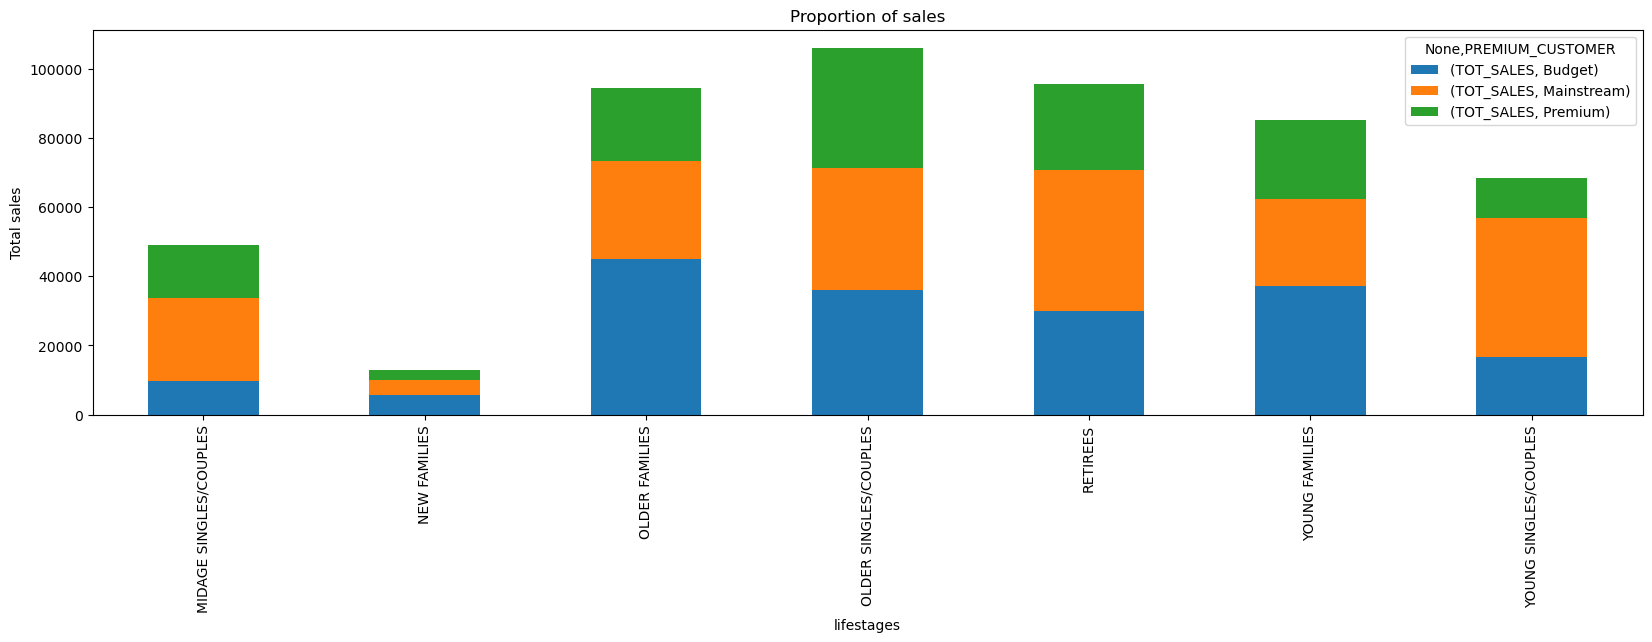

In [49]:
df8.plot(kind='bar', 
         stacked = True, 
         figsize=(20,5), 
         title = "Proportion of sales", 
         ylabel = 'Total sales',
         xlabel = 'lifestages')


#### Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees
#### Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [50]:
df5.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
3,4149,MIDAGE SINGLES/COUPLES,Budget,2019-05-16,4,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
4,5026,MIDAGE SINGLES/COUPLES,Budget,2018-08-20,5,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [58]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
df9 = df5.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].mean().unstack().fillna(0)
df9

PROD_QTY                     
PREMIUM_CUSTOMER          Budget Mainstream   Premium
LIFESTAGE                                            
MIDAGE SINGLES/COUPLES  1.896809   1.915092  1.887728
NEW FAMILIES            1.845238   1.844094  1.861915
OLDER FAMILIES          1.942652   1.949173  1.949856
OLDER SINGLES/COUPLES   1.907773   1.911662  1.914889
RETIREES                1.893844   1.881840  1.891097
YOUNG FAMILIES          1.935257   1.942370  1.936106
YOUNG SINGLES/COUPLES   1.793575   1.853447  1.812432

<Axes: title={'center': 'Average number of units per customer'}, xlabel='Customers', ylabel='Average unit'>

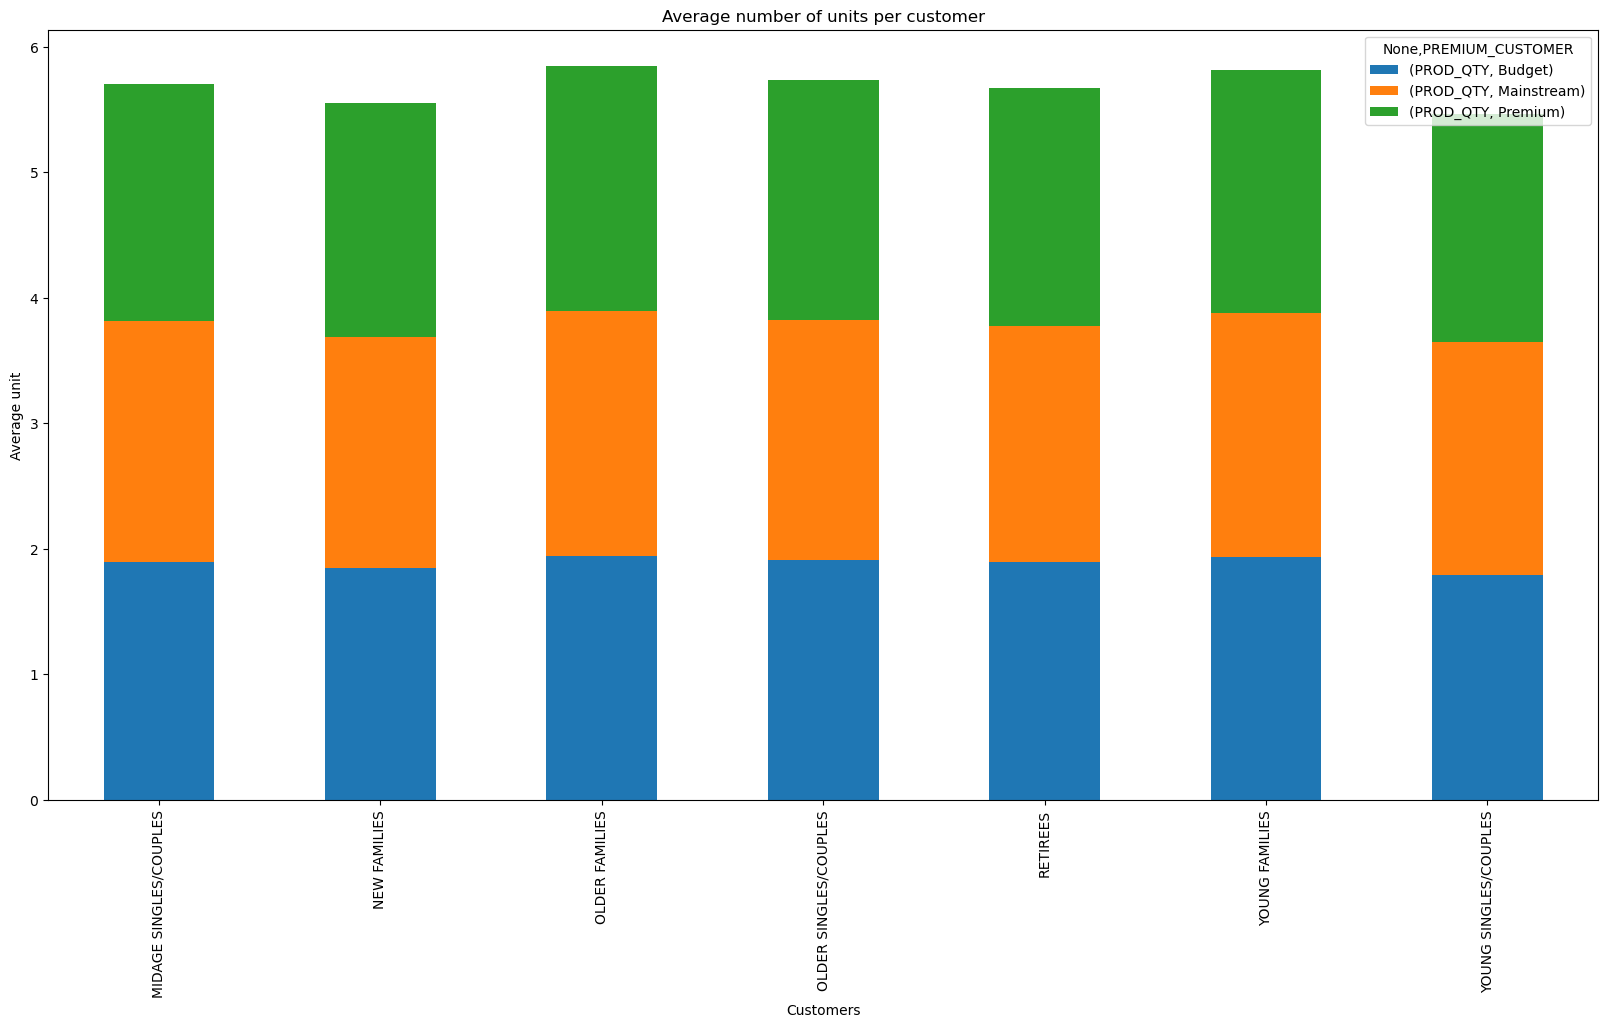

In [61]:
df9.plot(kind='bar', 
         stacked = True, 
         figsize=(20,10), 
         title = "Average number of units per customer", 
         ylabel = 'Average unit',
         xlabel = 'Customers')


##### Older families and young families in general buy more chips per customer

In [62]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
df10 = df5.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].mean().unstack().fillna(0)
df10

TOT_SALES                     
PREMIUM_CUSTOMER          Budget Mainstream   Premium
LIFESTAGE                                            
MIDAGE SINGLES/COUPLES  6.679090   7.185839  6.679460
NEW FAMILIES            6.727857   6.782835  6.875947
OLDER FAMILIES          6.860254   6.881931  6.788917
OLDER SINGLES/COUPLES   6.949536   6.866176  6.950704
RETIREES                6.980674   6.813041  6.944121
YOUNG FAMILIES          6.856104   6.850514  6.865913
YOUNG SINGLES/COUPLES   6.195384   7.100815  6.269946

<Axes: title={'center': 'Average price per units'}, xlabel='Customers', ylabel='Average price'>

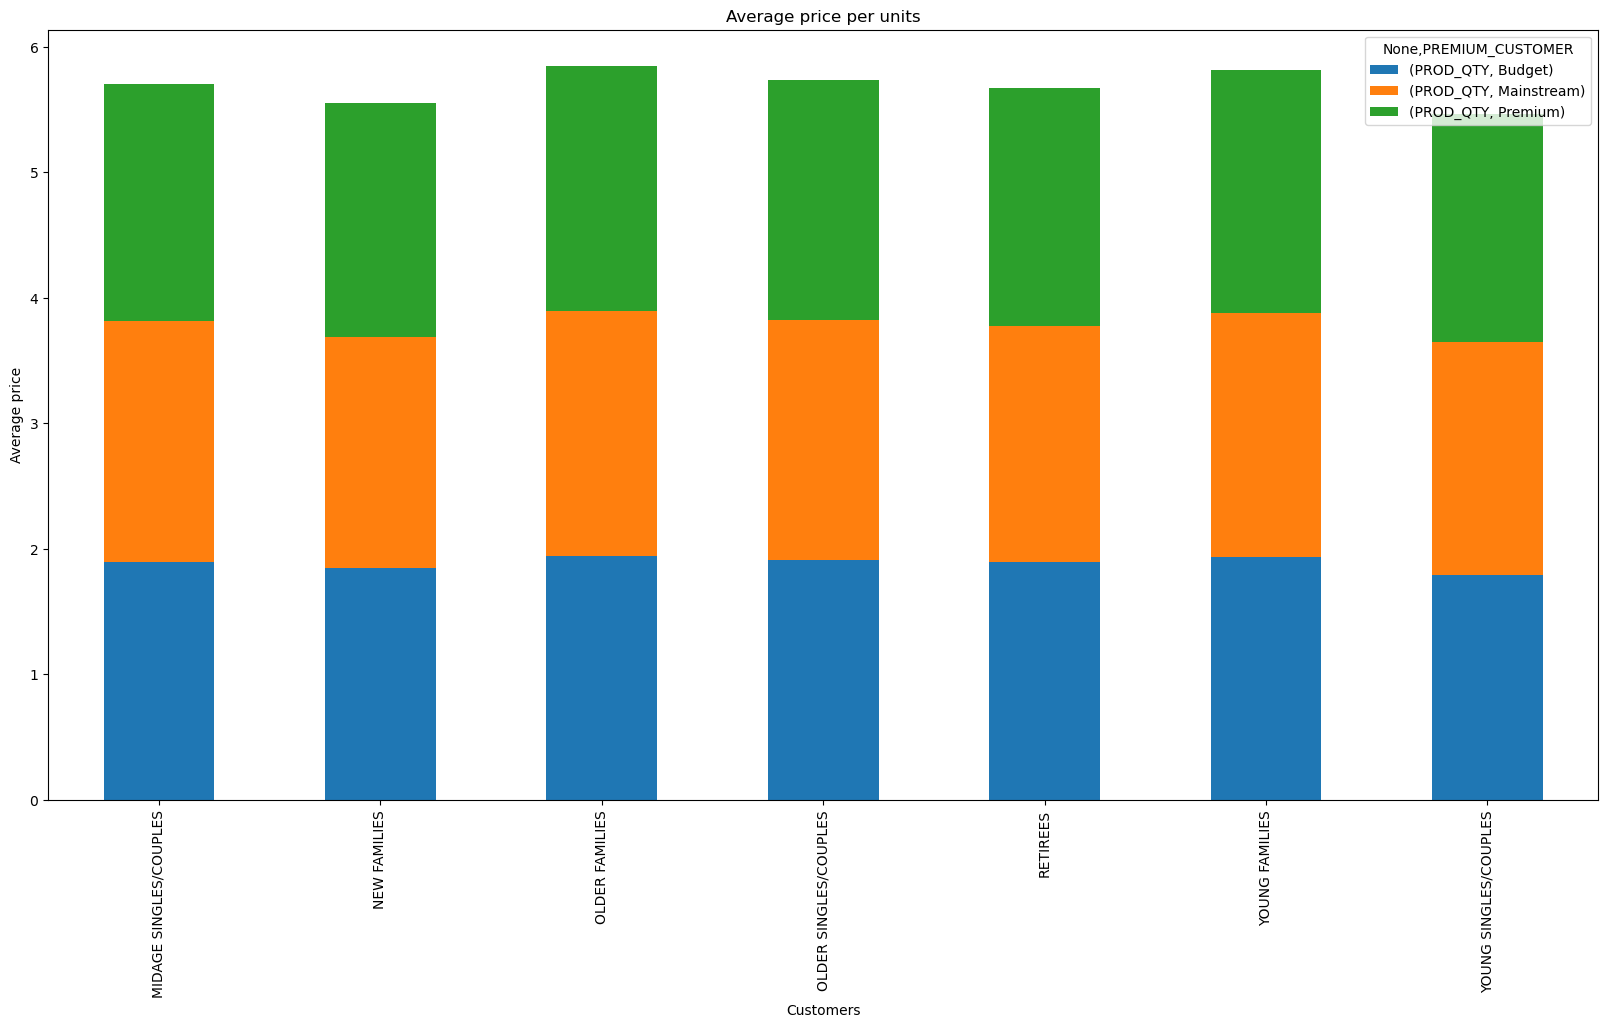

In [63]:
df9.plot(kind='bar', 
         stacked = True, 
         figsize=(20,10), 
         title = "Average price per units", 
         ylabel = 'Average price',
         xlabel = 'Customers')

##### Mainstream midage and young singles and couples are more willing to pay more per packet of chips com- pared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.


# Conclusion
#### Let’s recap what we’ve found!
#### Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and re- tirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s per- formance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.
#### Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement. We’ll work on measuring the impact of trials in the next task and putting all these together in the third task.